# Implementacja

#### Importy

In [2]:
import time
import random
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from heapq import heappush, heappop

#### Union-find

In [3]:
class DSU:
  def __init__(self, n):
    self.parent = list(range(n))
    self.rank = [1] * n

  def find(self, i):
    if self.parent[i] != i:
      self.parent[i] = self.find(self.parent[i])
    return self.parent[i]

  def union(self, x, y):
    s1 = self.find(x)
    s2 = self.find(y)
    if s1 != s2:
      if self.rank[s1] < self.rank[s2]:
        self.parent[s1] = s2
      elif self.rank[s1] > self.rank[s2]:
        self.parent[s2] = s1
      else:
        self.parent[s2] = s1
        self.rank[s1] += 1


### Generator grafów

Generuje prosty graf pełny o n wierzchołkach, z wagami krawędzi
pochodzącymi z rozkładu dist z parametrami *params.

Dostępne rozkłady: 
- 'uniform'       -       rozkład jednostajny;        *params: a, b - krańce przedziału
- 'beta'          -       rozkład beta;               *params: alpha, beta
- 'gamma'         -       rozkład gamma;              *params: alpha, beta

Zwraca macierz sąsiedztwa grafu z jego wagami.

In [4]:
def gen_full_graph_matrix(n, dist='uniform', *params, rng=None):
  if rng is None:
    rng = random
  E = np.zeros((n, n), dtype=np.float64)
  for i in range(n):
    for j in range(i+1, n):
      if dist == 'uniform':
        w = rng.uniform(*params)
      elif dist == 'beta':
        w = rng.betavariate(*params)
      elif dist == 'gamma':
        w = rng.gammavariate(*params)
      else:
        raise ValueError('Unrecognized distribution')
      E[i, j] = E[j, i] = w
  return E

## Algorytmy MST

### Algorytm Prima

In [5]:
# Prim O(n^2) zwracający koszt MST
def prim_mst_cost(E):
  n = E.shape[0]
  in_mst = [False] * n
  key = [float('inf')] * n
  key[0] = 0.0
  parent = [-1] * n
  for _ in range(n):
    # wybierz wierzchołek z minimalnym key spoza MST
    u = -1
    best = float('inf')
    for v in range(n):
      if not in_mst[v] and key[v] < best:
        best = key[v]
        u = v
    if u == -1:
      break
    in_mst[u] = True
    # aktualizuj klucze
    for v in range(n):
      if not in_mst[v] and E[u, v] > 0 and E[u, v] < key[v]:
        key[v] = E[u, v]
        parent[v] = u
  # oblicz koszt
  cost = 0.0
  for v in range(1, n):
    if parent[v] != -1:
      cost += E[v, parent[v]]
  return cost

### Algorytm Kruskala

In [ ]:
# Kruskal O(E*log(E)) =|dla E=n^2|= O(n^2*log(n^2)) zwracający koszt MST 
def kruskal_mst_cost(E):
  n = E.shape[0]
  edges = []
  for i in range(n):
    for j in range(i+1, n):
      edges.append((E[i, j], i, j))
  edges.sort(key=lambda x: x[0])
  dsu = DSU(n)
  cost = 0.0
  taken = 0
  for w, u, v in edges:
    if dsu.find(u) != dsu.find(v):
      dsu.union(u, v)
      cost += w
      taken += 1
      if taken == n - 1:
        break
  return cost

## Symulacja

#### Parametry eksperymentu


In [ ]:
n_min = 10
n_max = 300
step = 10
reps = 100

distributions = [
  ('uniform', (0.0, 1.0)),
  ('gamma', (math.pi, math.e)),
  ('beta', (math.pi, math.e)),
  ('beta', (0.5, 0.5)),
  ('beta', (1, 2)),
  ('beta', (1, 3)),
  ('beta', (2, 1)),
  ('beta', (2, 2)),
  ('beta', (0.5, 2)),
  ('beta', (0.1, 0.7)),
  ('gamma', (2, 2)),
  ('gamma', (1, 2)),
  ('gamma', (2, 1)),
  ('gamma', (2, 3)),
  ('gamma', (2, 4))
]

# dla powtarzalności:
SEED = 12345
random.seed(SEED)
np.random.seed(SEED)

#### Eksperyment

Progress: 100/45000 runs done
Last run: dist=uniform(0.0,1.0), n=10, rep=99, prim_time=0.000032, kruskal_time=0.000024, prim_cost=1.481829, kruskal_cost=1.481829
Progress: 200/45000 runs done
Last run: dist=uniform(0.0,1.0), n=20, rep=99, prim_time=0.000109, kruskal_time=0.000101, prim_cost=1.524499, kruskal_cost=1.524499
Progress: 300/45000 runs done
Last run: dist=uniform(0.0,1.0), n=30, rep=99, prim_time=0.000264, kruskal_time=0.000202, prim_cost=0.845440, kruskal_cost=0.845440
Progress: 400/45000 runs done
Last run: dist=uniform(0.0,1.0), n=40, rep=99, prim_time=0.000429, kruskal_time=0.000361, prim_cost=1.105734, kruskal_cost=1.105734
Progress: 500/45000 runs done
Last run: dist=uniform(0.0,1.0), n=50, rep=99, prim_time=0.000670, kruskal_time=0.000618, prim_cost=0.921458, kruskal_cost=0.921458
Progress: 600/45000 runs done
Last run: dist=uniform(0.0,1.0), n=60, rep=99, prim_time=0.000974, kruskal_time=0.001451, prim_cost=1.170536, kruskal_cost=1.170536
Progress: 700/45000 runs don

/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


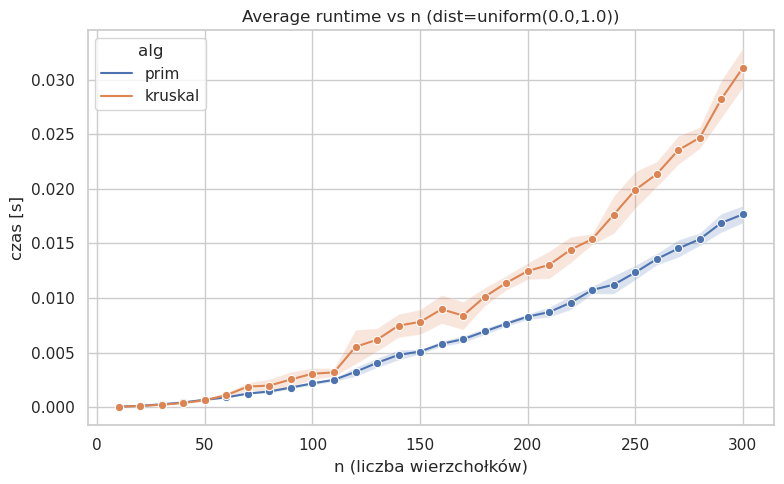

/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


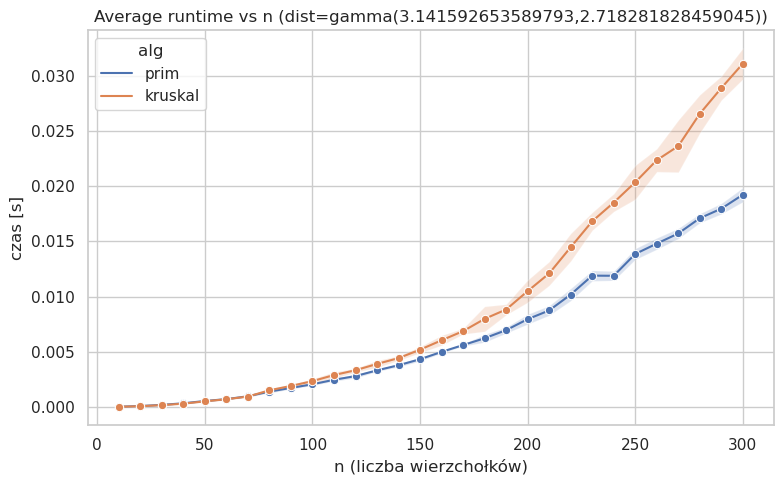

/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


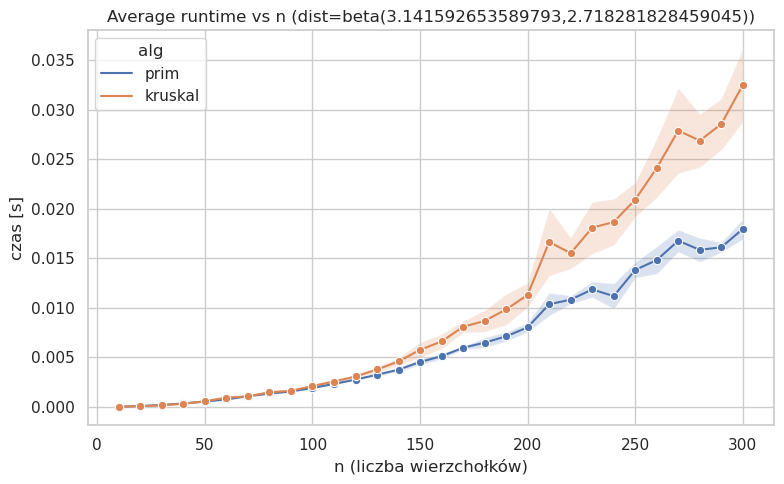

/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


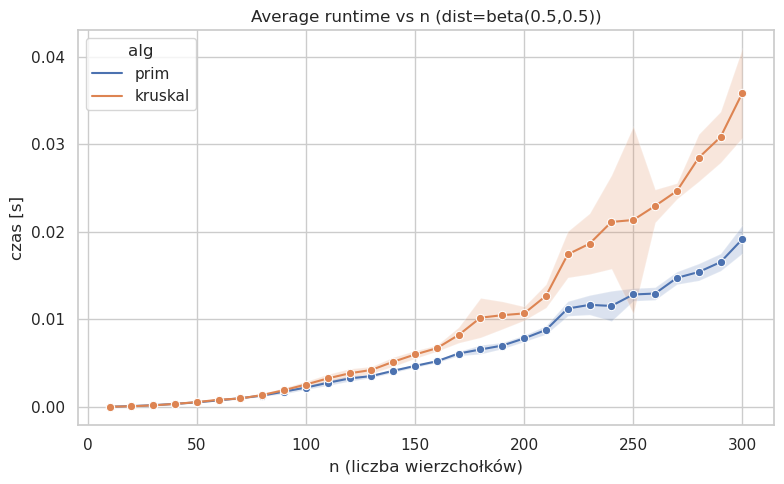

/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


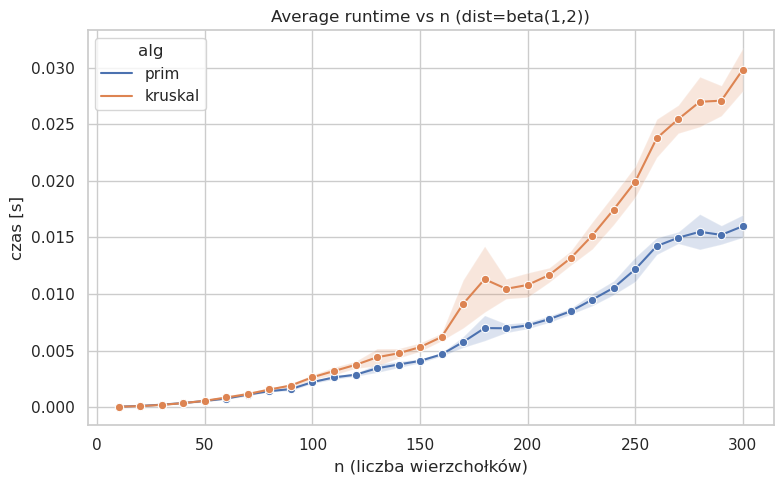

/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


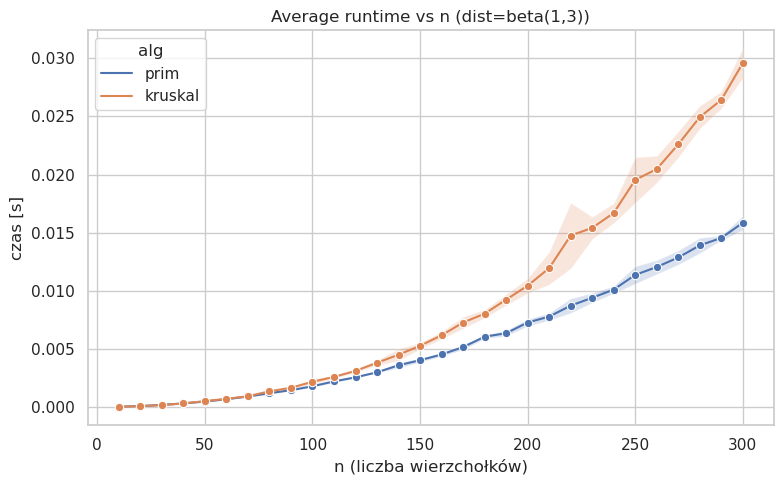

/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


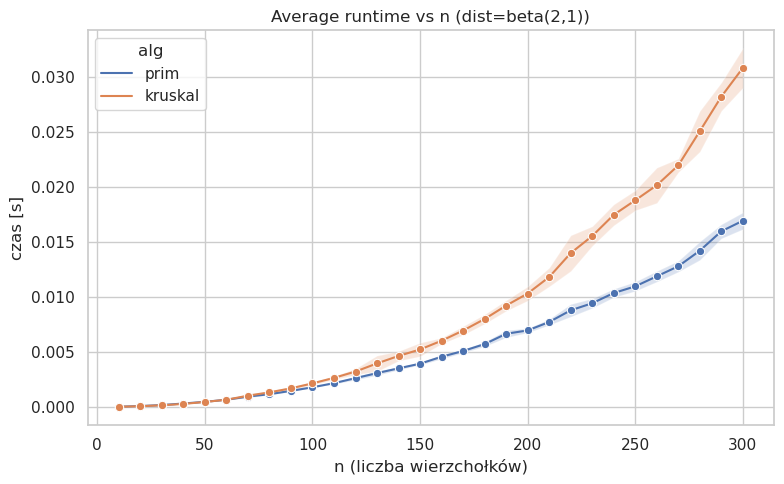

/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


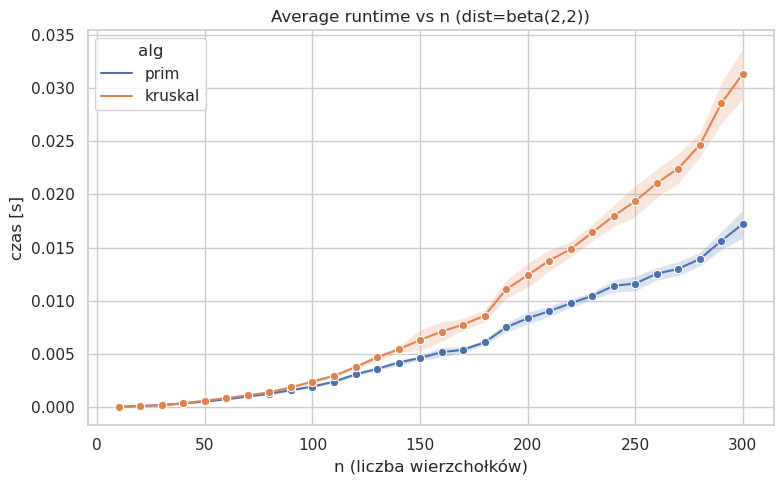

/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


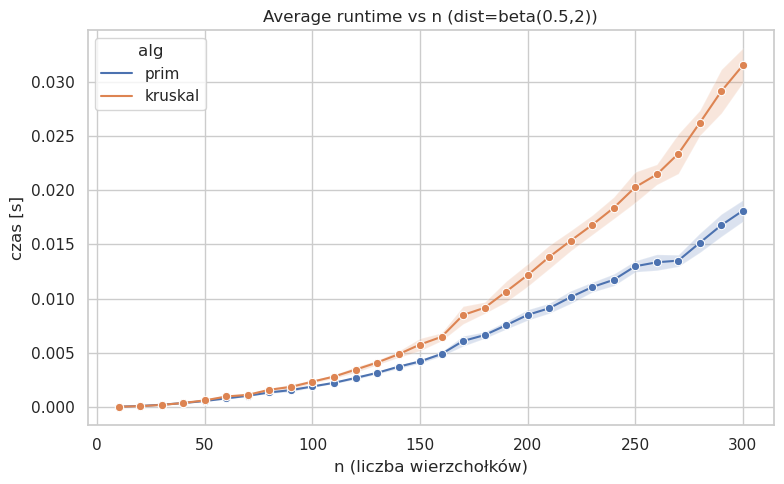

/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


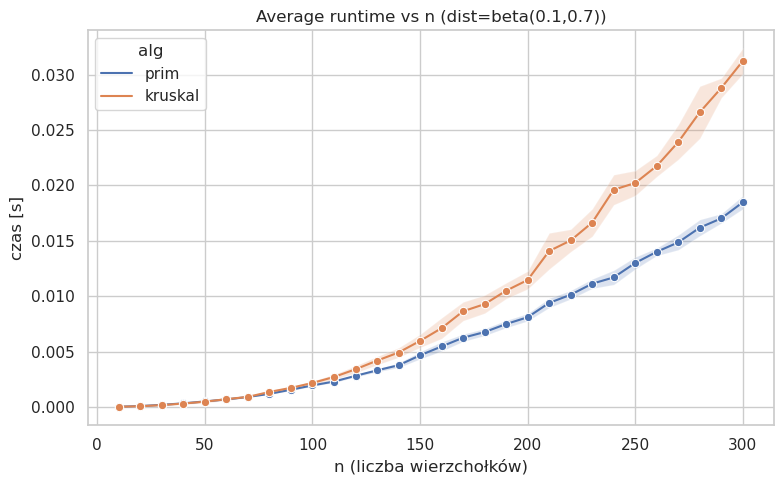

/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


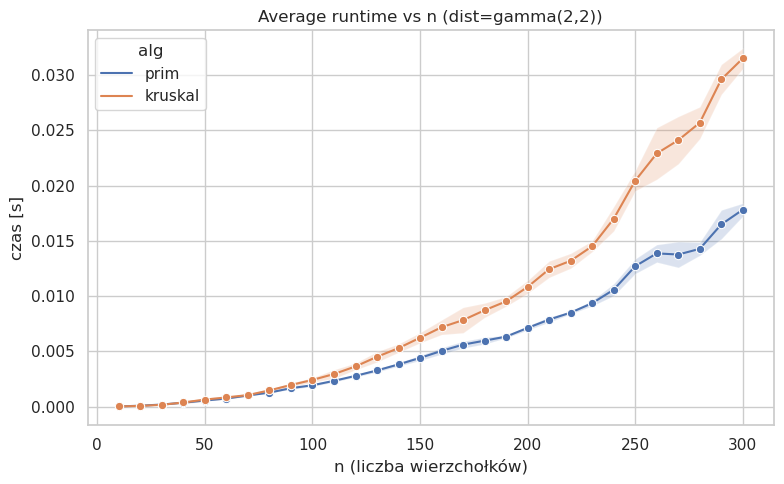

/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


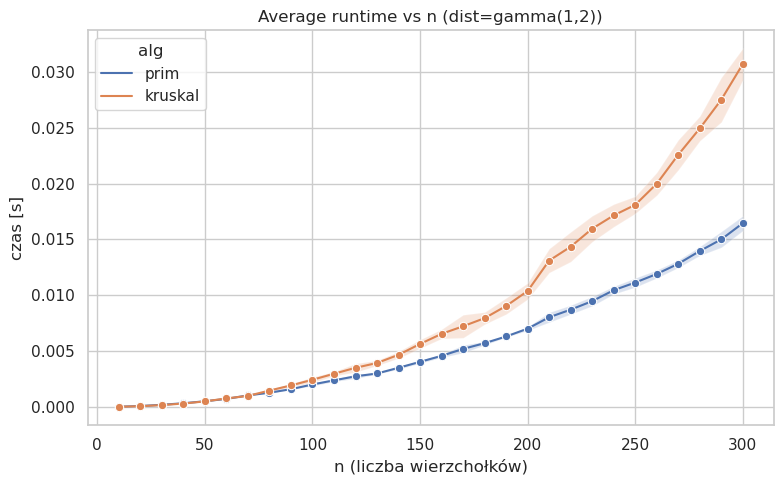

/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


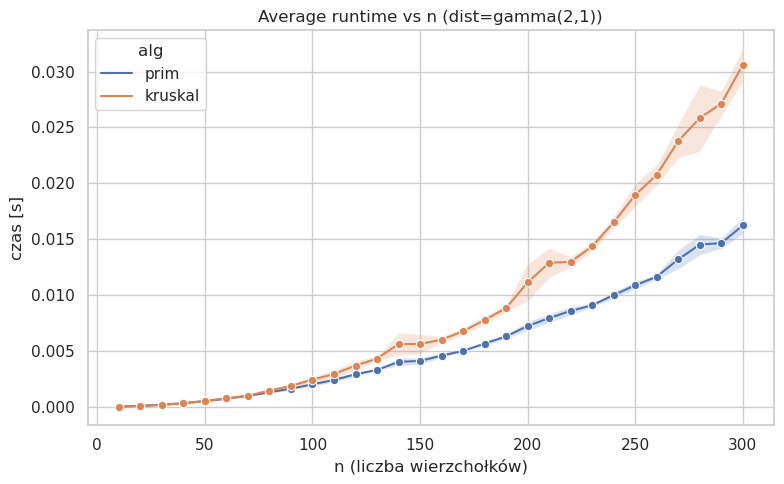

/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


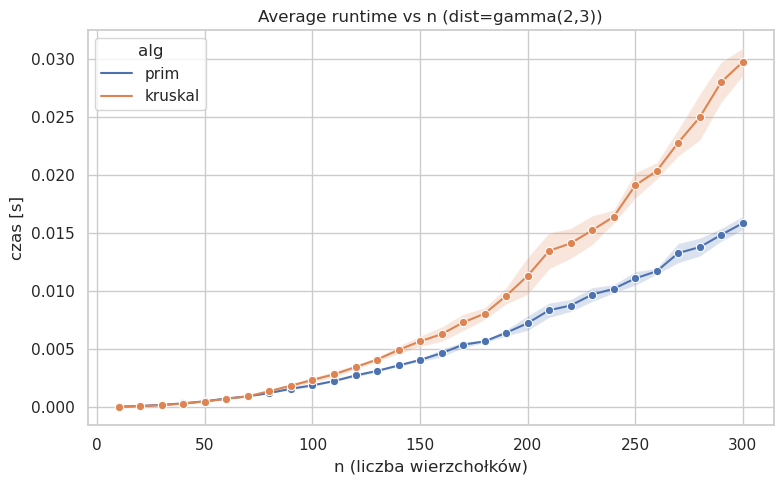

/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


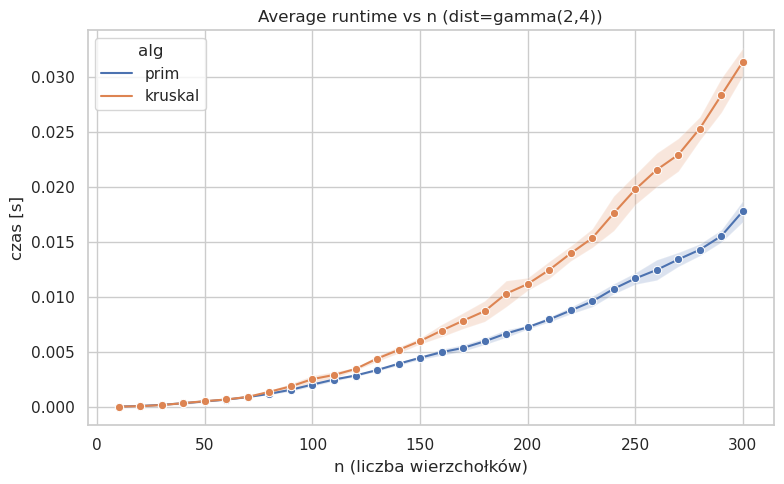

/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


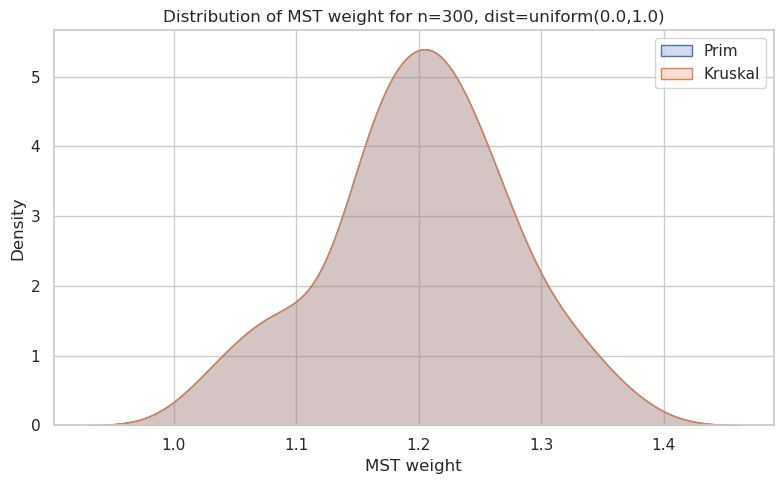

/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


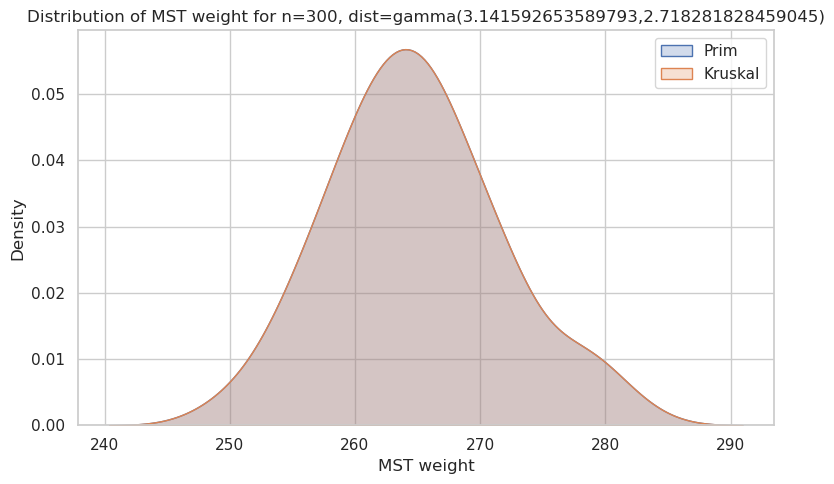

/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


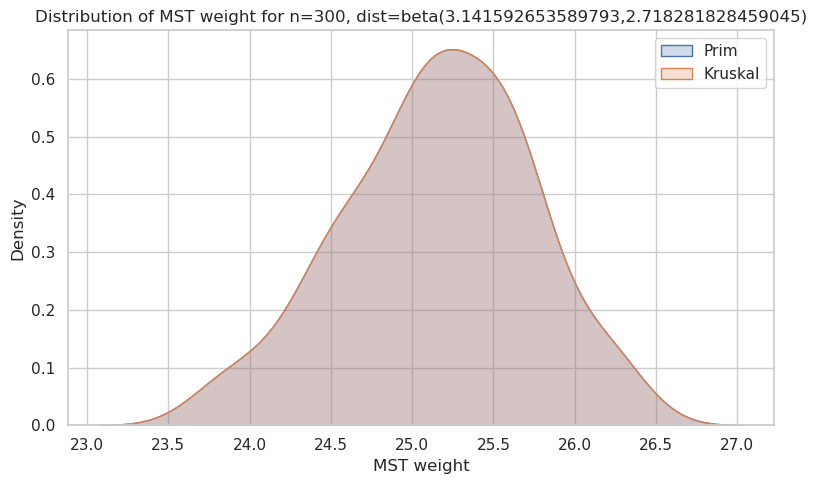

/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


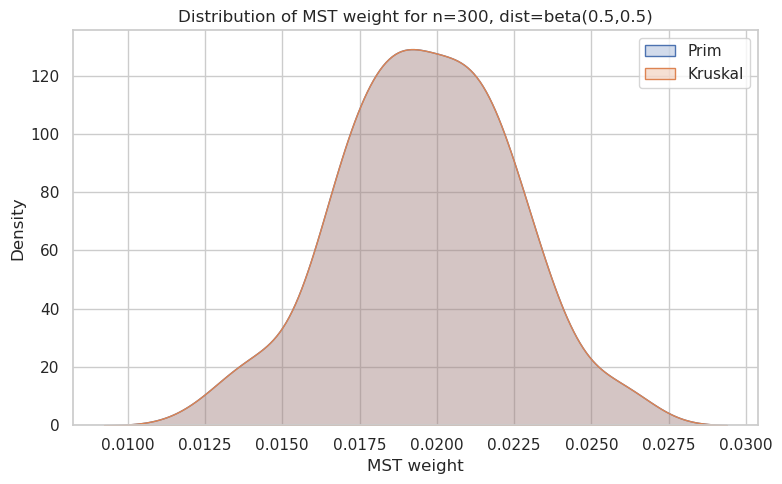

/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


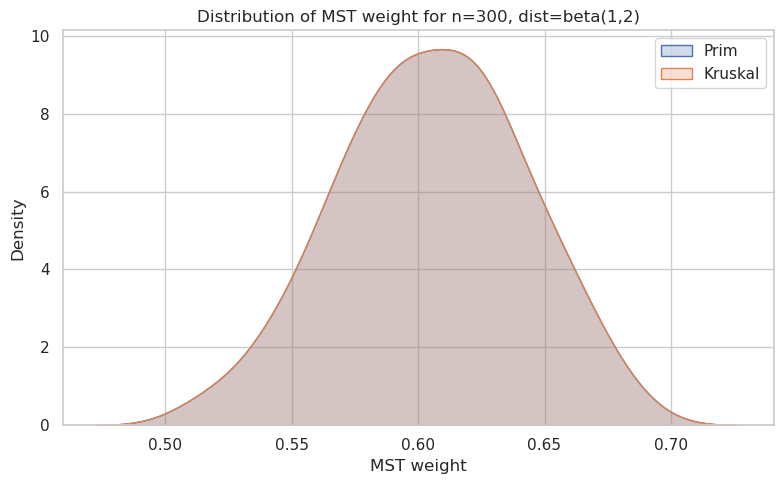

/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


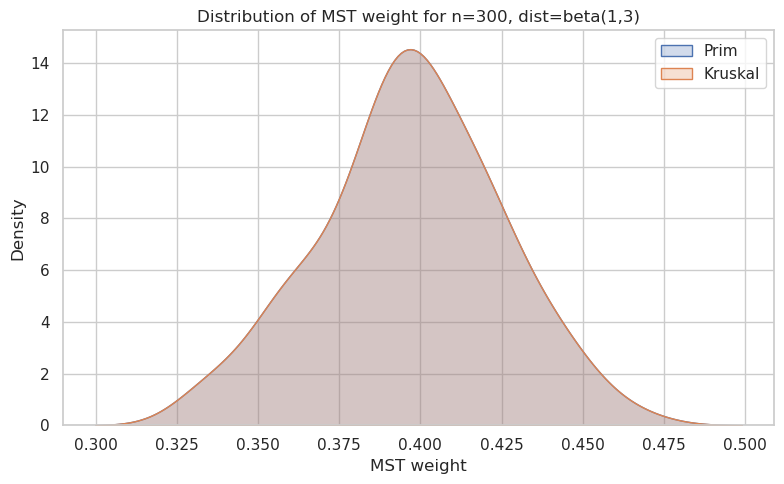

/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


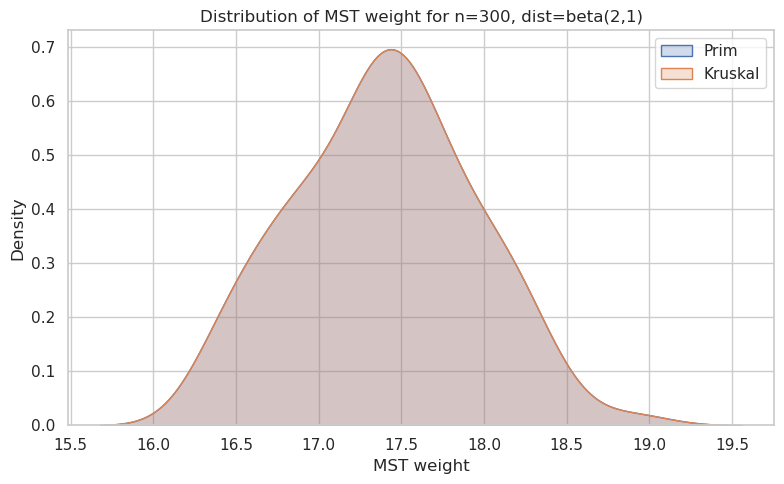

/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


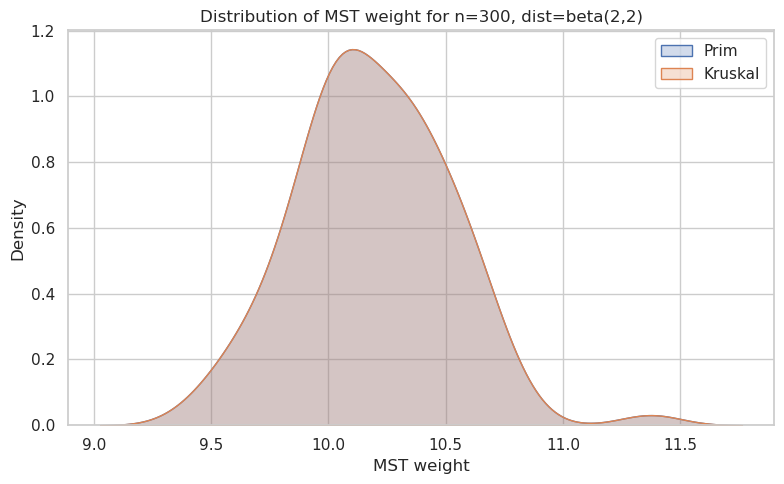

/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


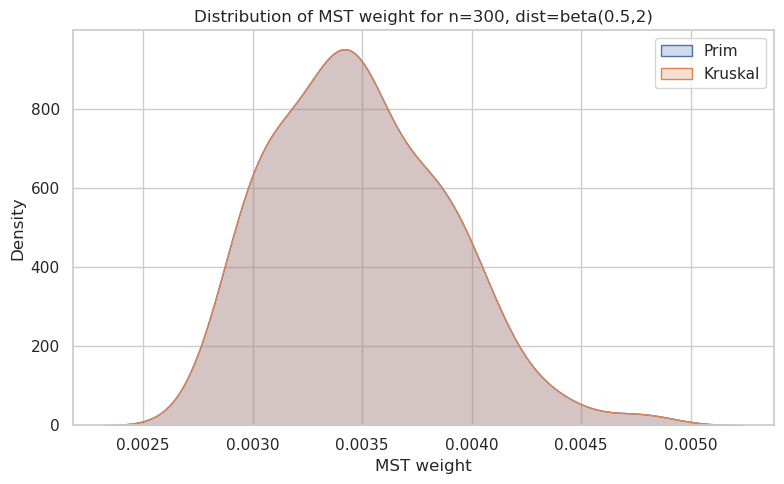

/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


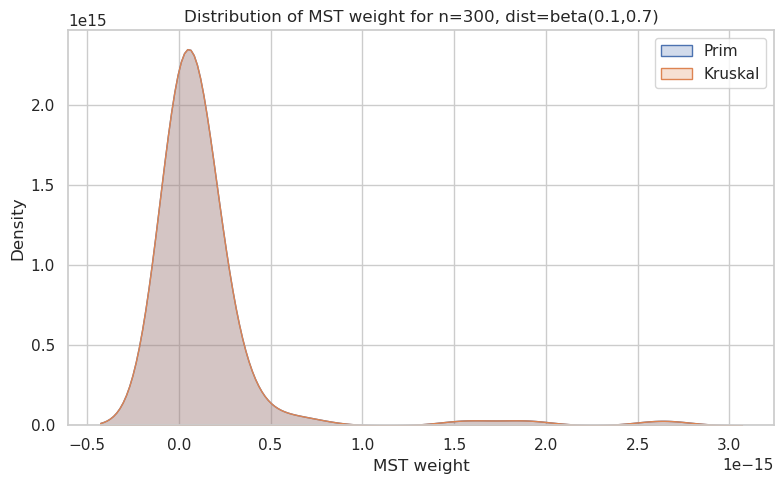

/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


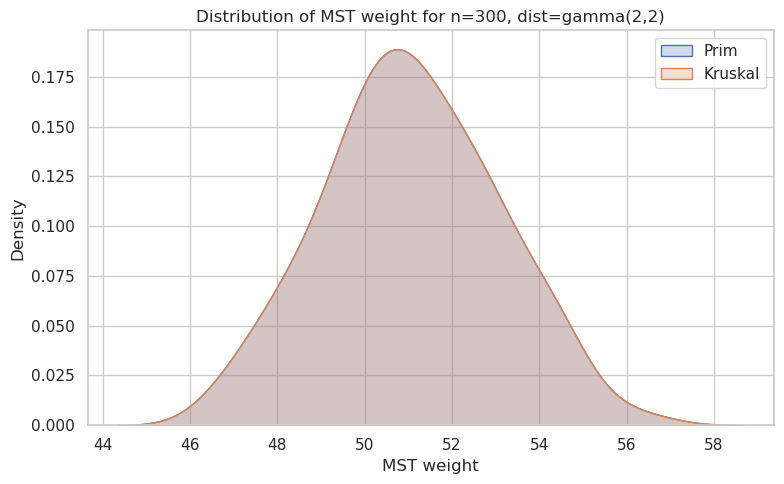

/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


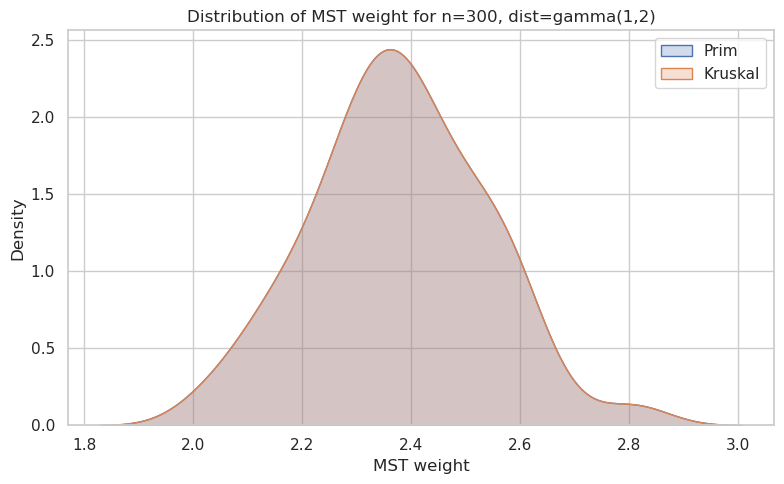

/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


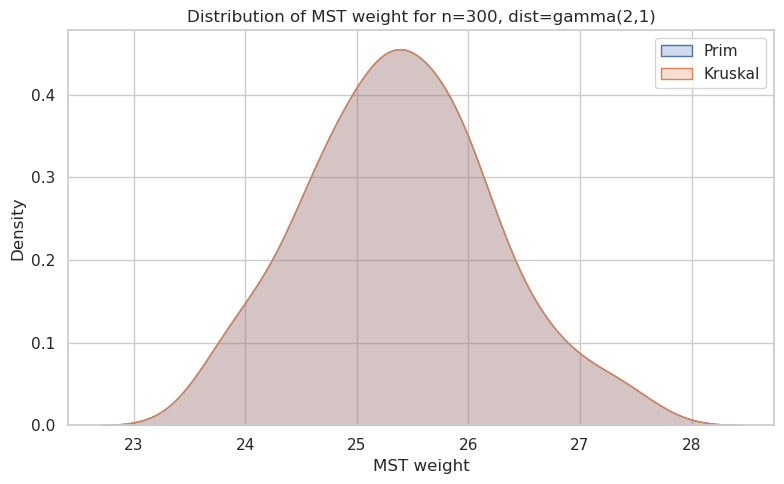

/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


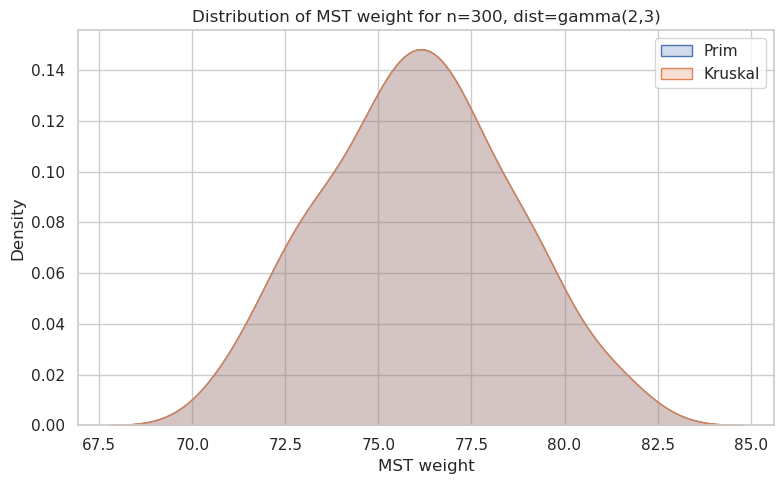

/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


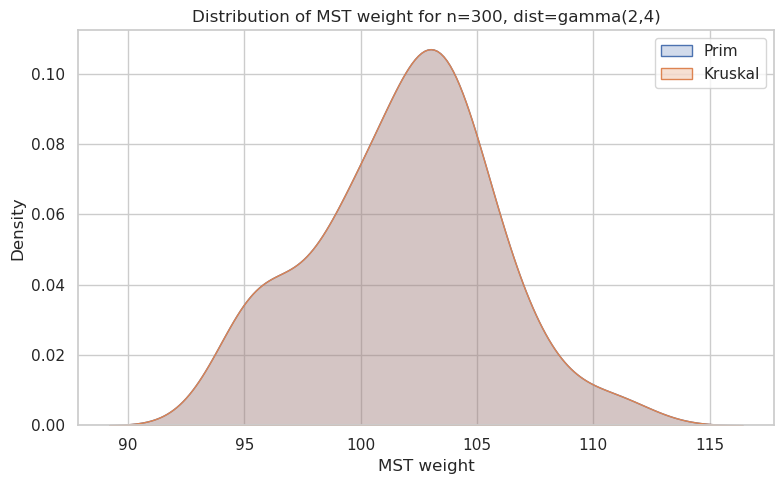

Wszystkie wyniki zapisane: mst_experiment_raw1.csv i mst_experiment_summary1.csv


In [ ]:
# miejsce na wyniki
rows = []

total_runs = len(distributions) * len(range(n_min, n_max+1, step)) * reps
run_i = 0

for dist_name, params in distributions:
  for n in range(n_min, n_max+1, step):
    for rep in range(reps):
      run_i += 1
      # generuj graf
      E = gen_full_graph_matrix(n, dist_name, *params, rng=random)
      # Prim
      t0 = time.perf_counter()
      prim_cost = prim_mst_cost(E)
      t1 = time.perf_counter()
      prim_time = t1 - t0
      # Kruskal
      t0 = time.perf_counter()
      kruskal_cost = kruskal_mst_cost(E)
      t1 = time.perf_counter()
      kruskal_time = t1 - t0

      rows.append({
        'dist': f"{dist_name}({params[0]},{params[1]})",
        'n': n,
        'rep': rep,
        'prim_time': prim_time,
        'kruskal_time': kruskal_time,
        'prim_cost': prim_cost,
        'kruskal_cost': kruskal_cost
      })

      if run_i % 100 == 0:
        print(f'Progress: {run_i}/{total_runs} runs done')
        print(f'Last run: dist={dist_name}({params[0]},{params[1]}), n={n}, rep={rep}, prim_time={prim_time:.6f}, kruskal_time={kruskal_time:.6f}, prim_cost={prim_cost:.6f}, kruskal_cost={kruskal_cost:.6f}')

df = pd.DataFrame(rows)

#### Funkcja licząca statystyki

In [7]:
# Statystyki (dla każdego (dist, n, alg) )
def summarize_times_and_costs(df):
  groups = []
  for dist_name in df['dist'].unique():
    for n in sorted(df.loc[df['dist'] == dist_name, 'n'].unique()):
      sub = df[(df['dist'] == dist_name) & (df['n'] == n)]
      for alg in ['prim', 'kruskal']:
        times = sub[f'{alg}_time']
        costs = sub[f'{alg}_cost']
        groups.append({
          'dist': dist_name,
          'n': n,
          'alg': alg,
          'time_mean': times.mean(),
          'time_std': times.std(ddof=0),
          'time_min': times.min(),
          'time_max': times.max(),
          'time_cv': times.std(ddof=0) / times.mean() if times.mean() > 0 else np.nan,
          'cost_mean': costs.mean(),
          'cost_std': costs.std(ddof=0),
          'cost_min': costs.min(),
          'cost_max': costs.max()
        })
  return pd.DataFrame(groups)

In [ ]:

summary_df = summarize_times_and_costs(df)
print(summary_df.head())

### Generowanie wykresów

/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


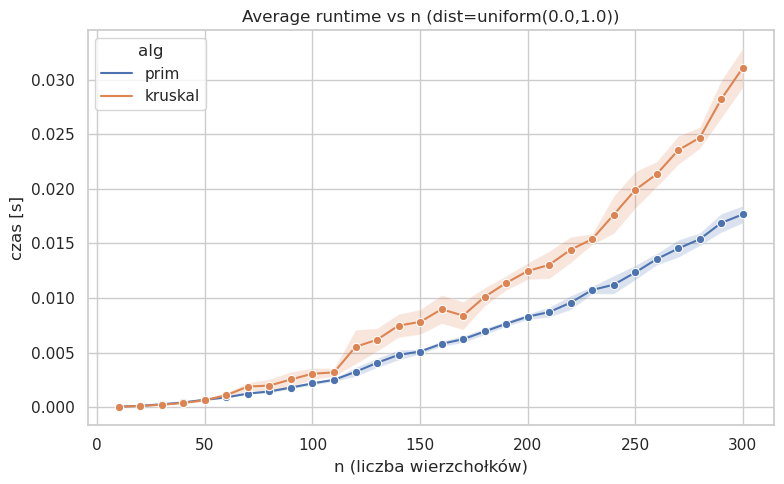

/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


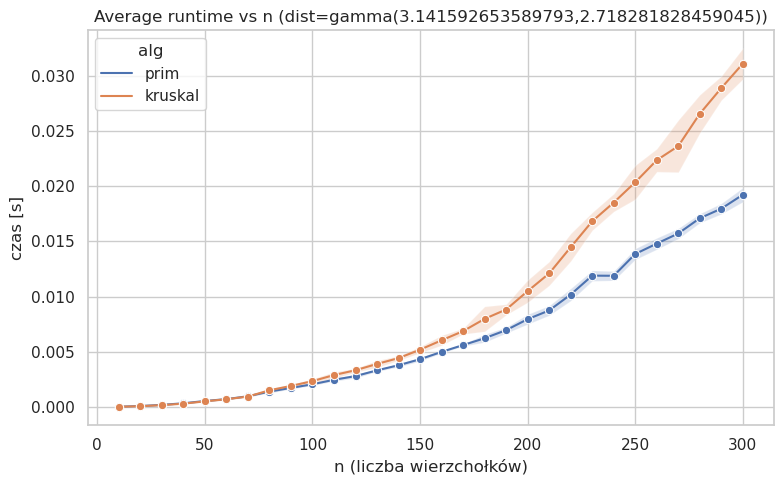

/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


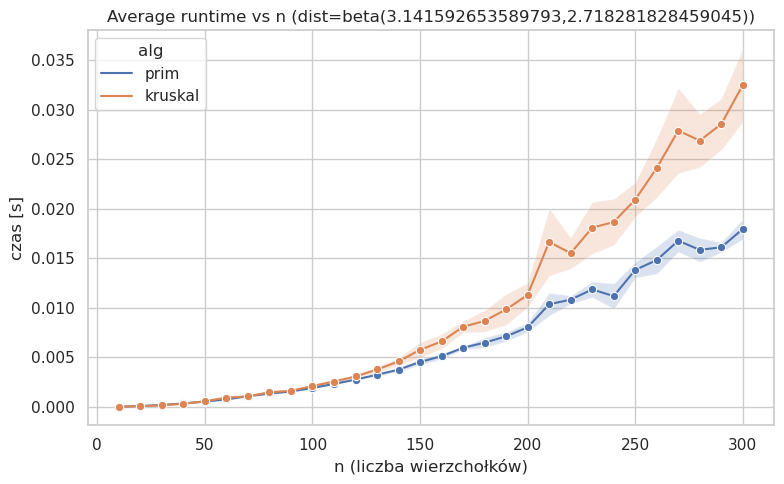

/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


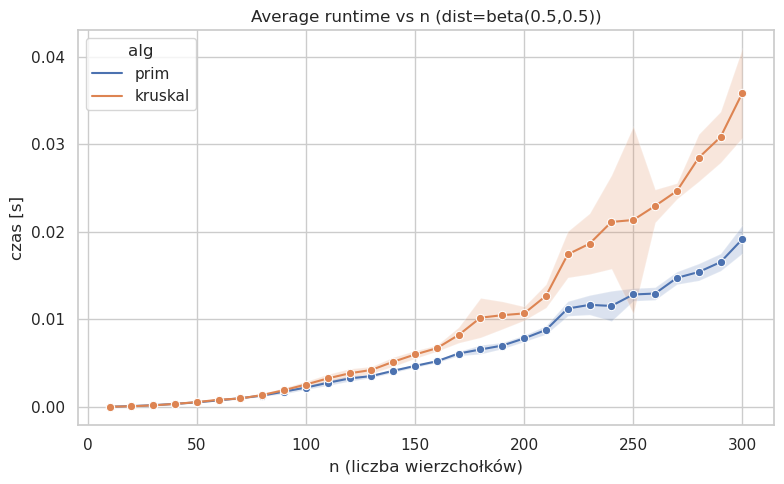

/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


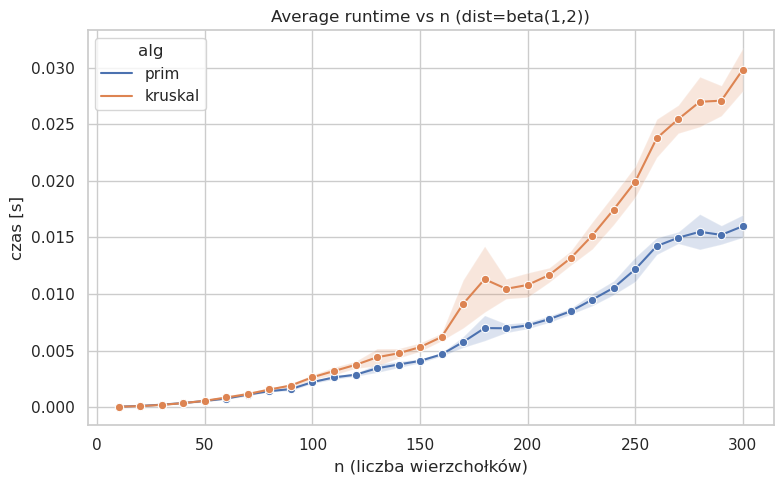

/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


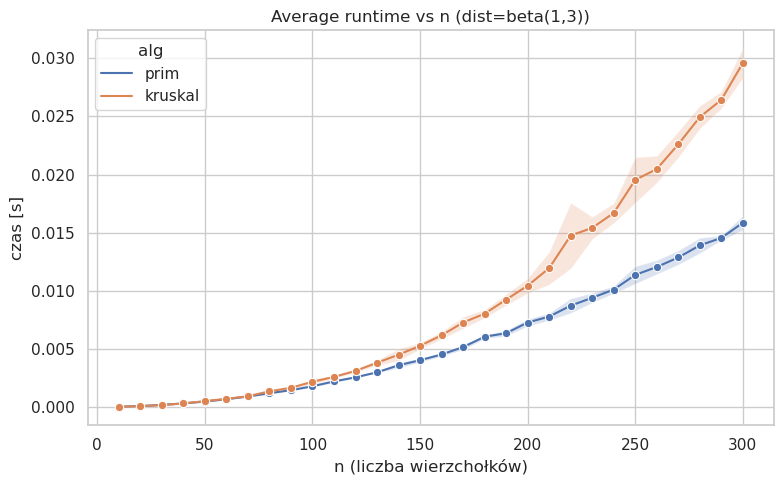

/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


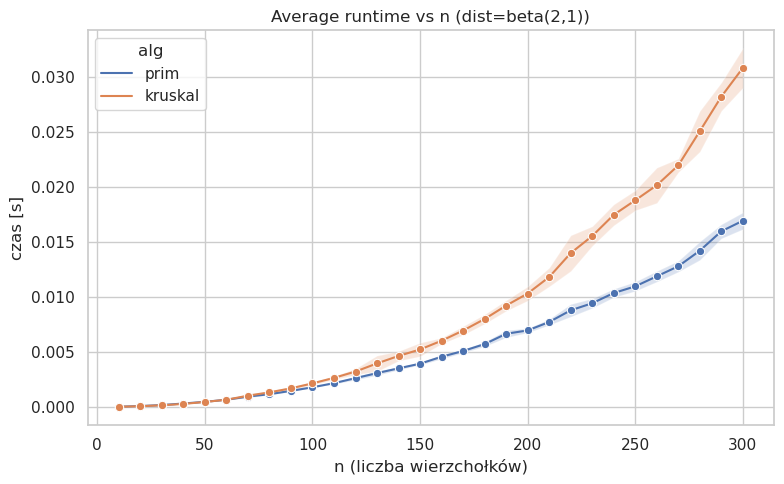

/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


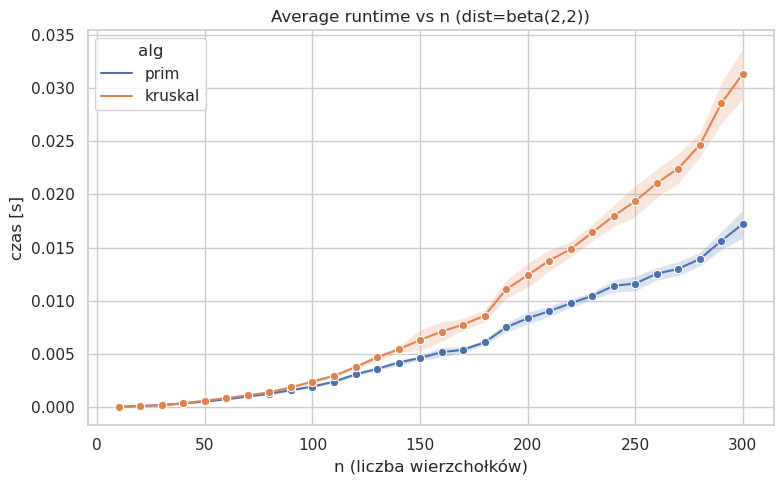

/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


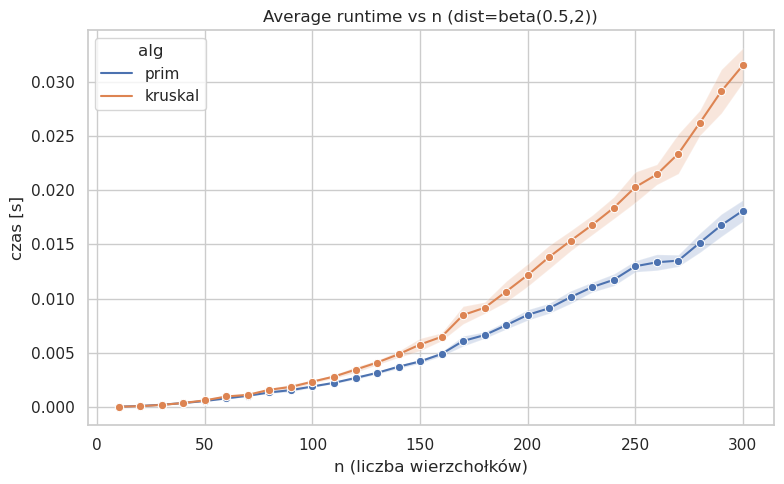

/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


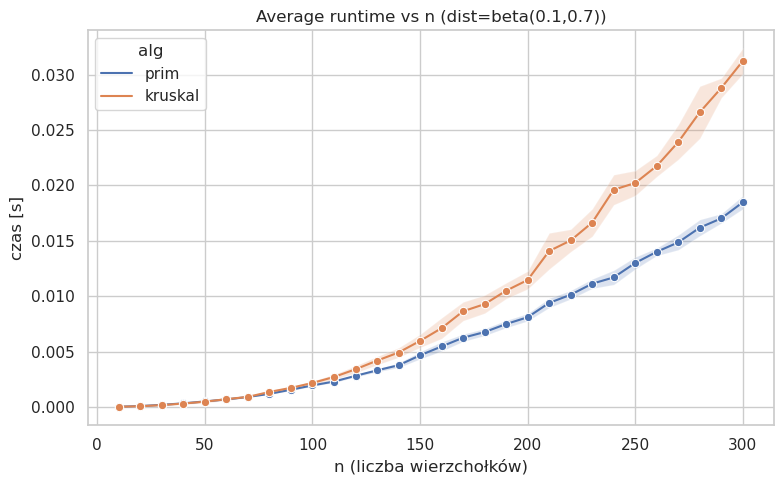

/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


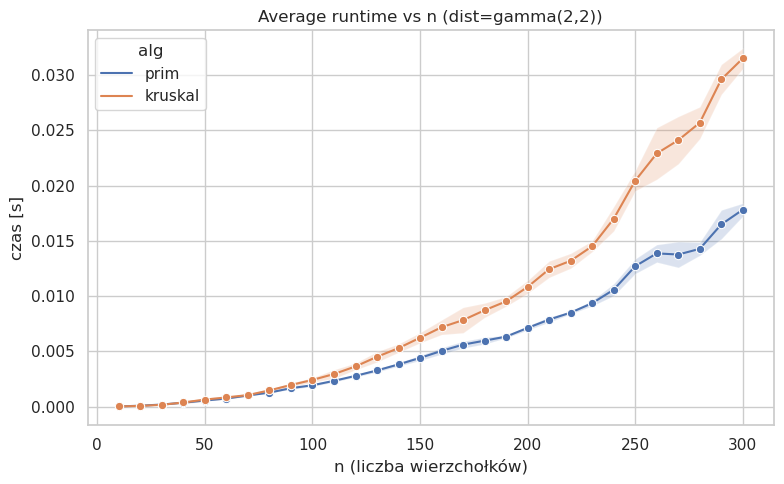

/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


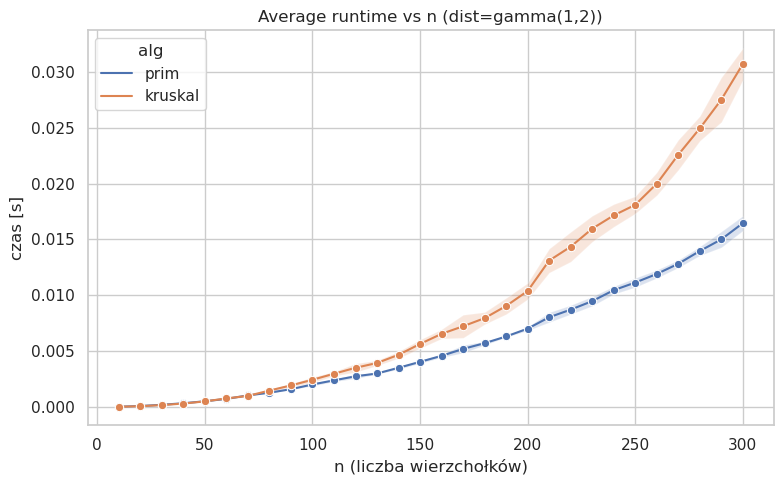

/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


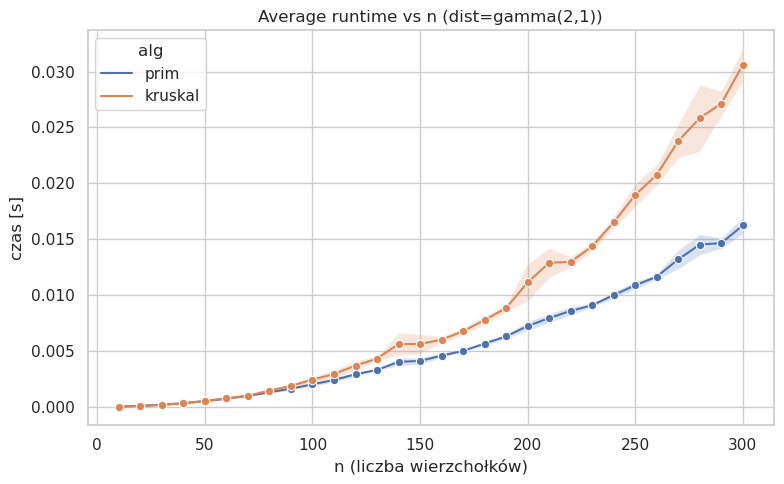

/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


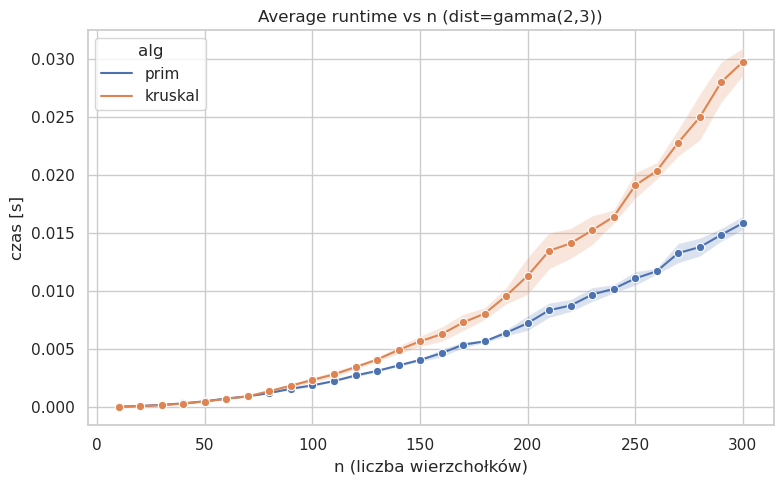

/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


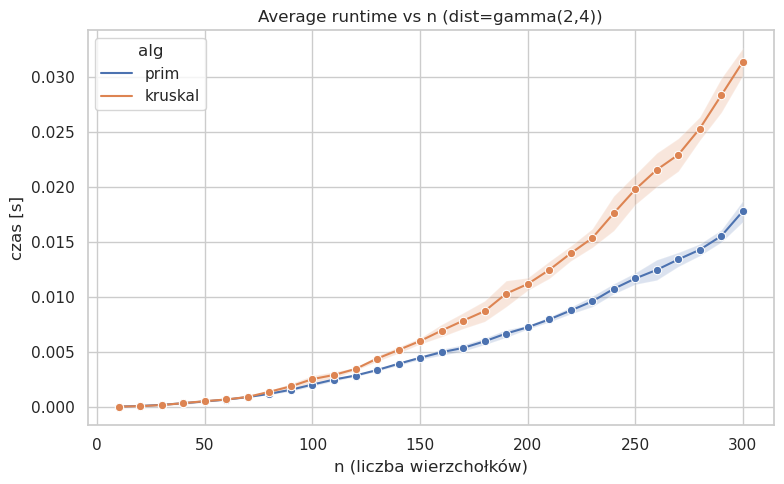

/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


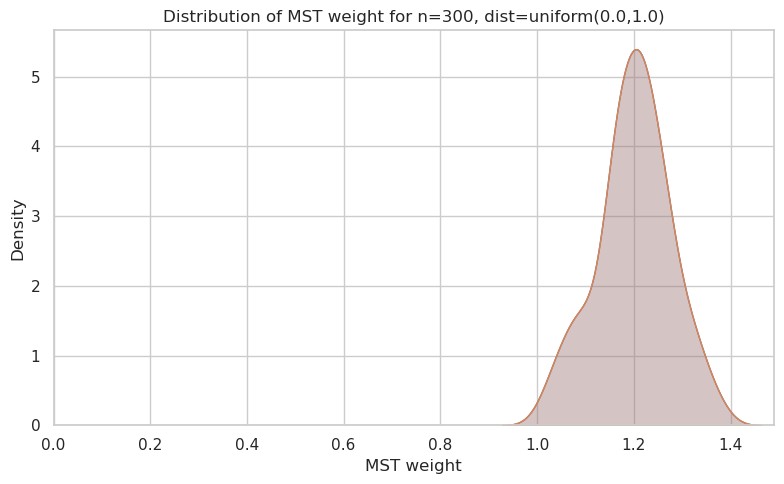

/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


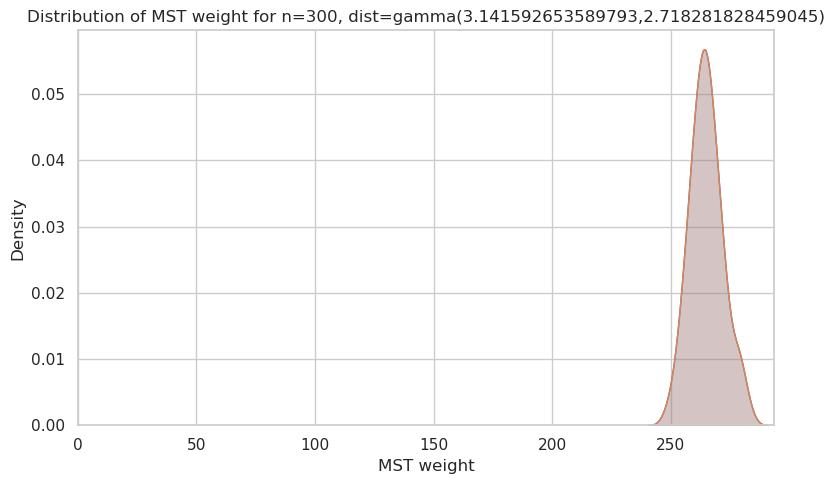

/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


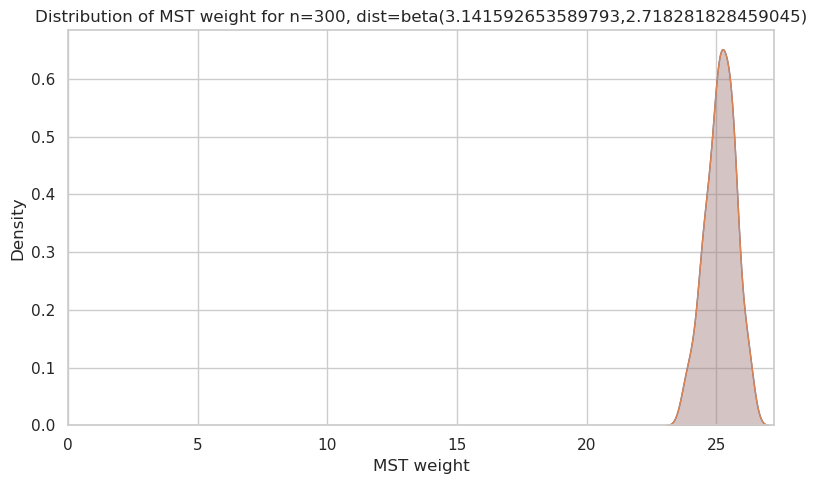

/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


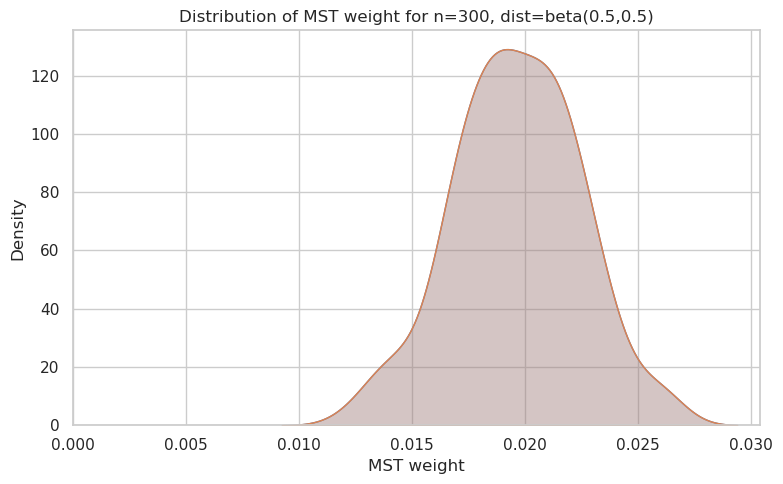

/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


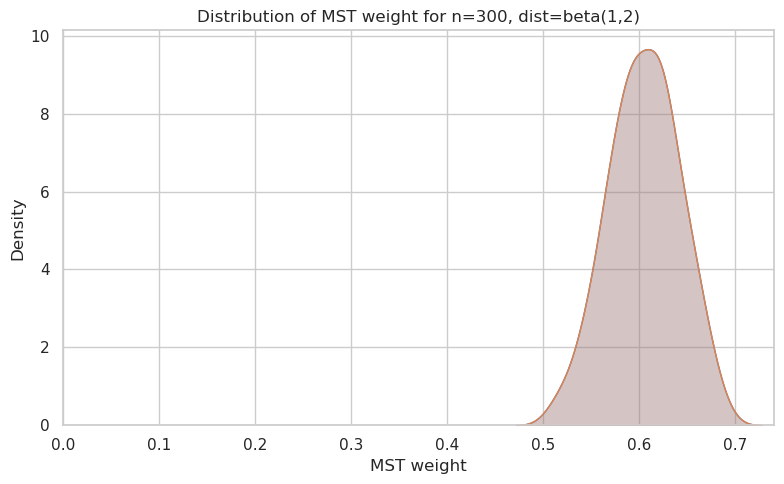

/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


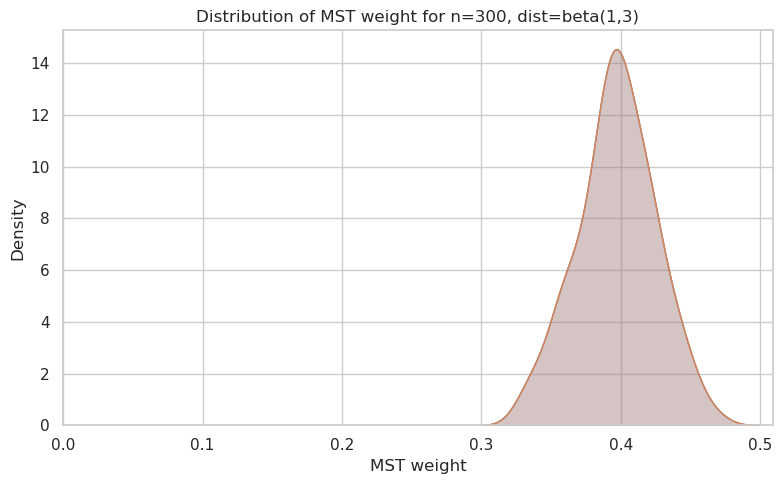

/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


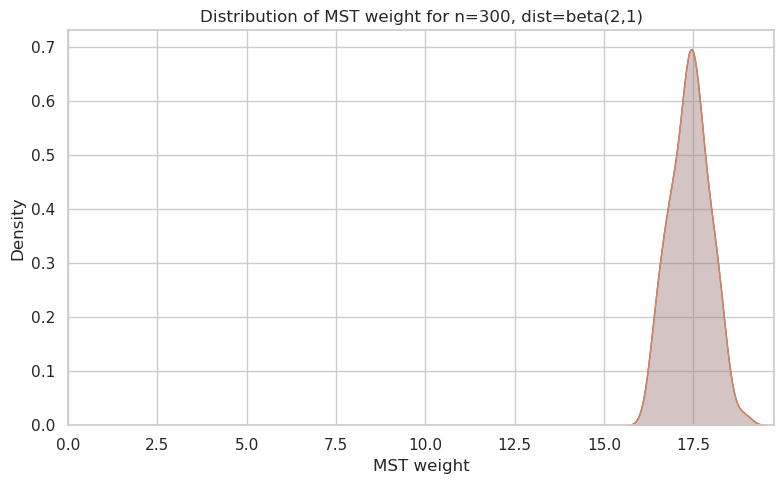

/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


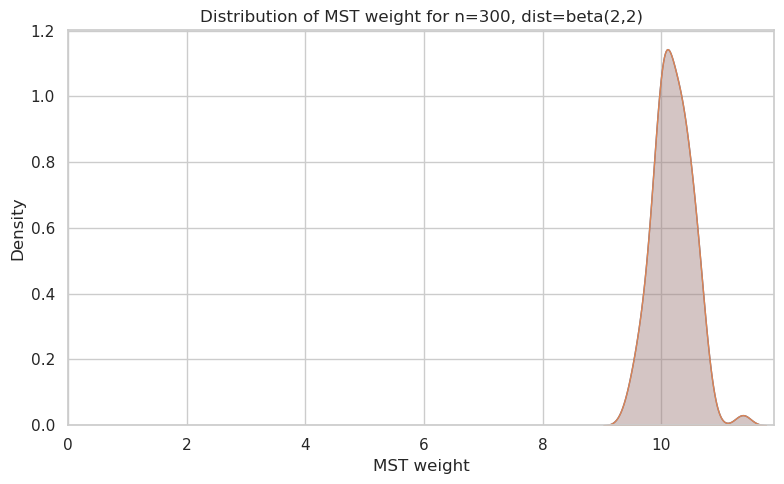

/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


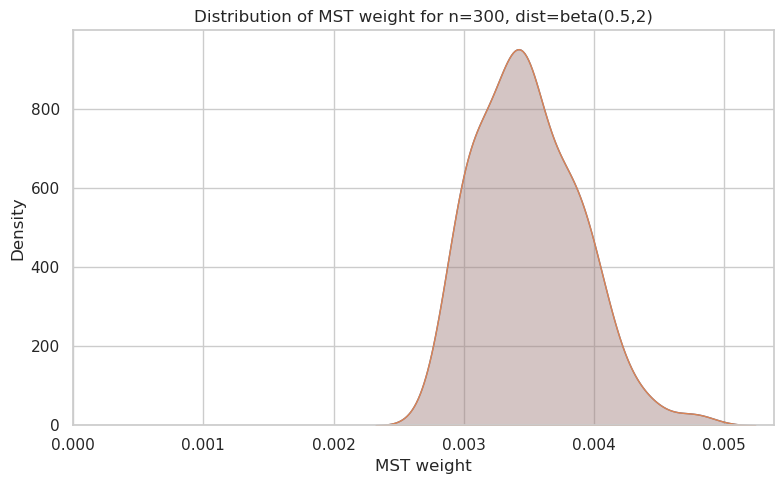

/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


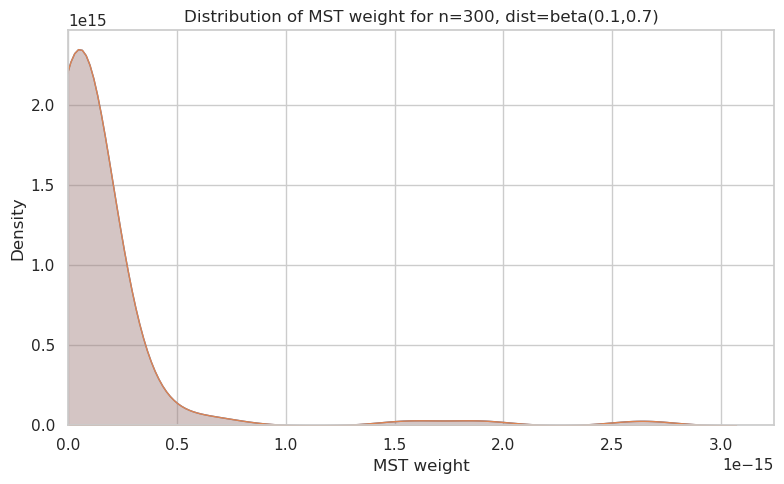

/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


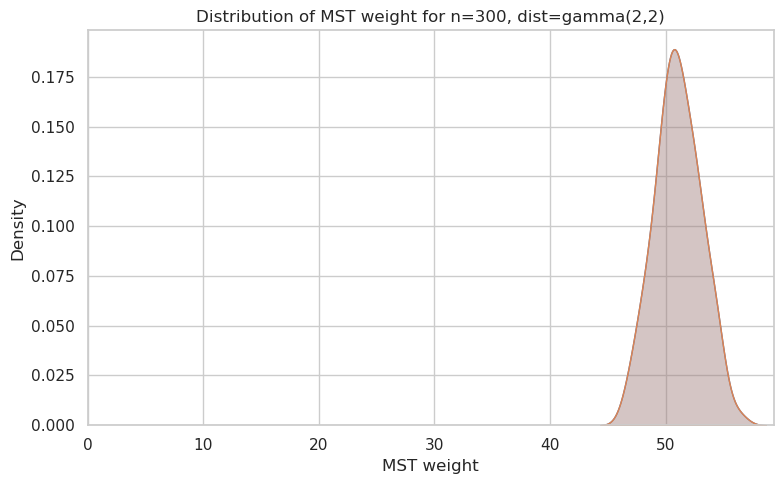

/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


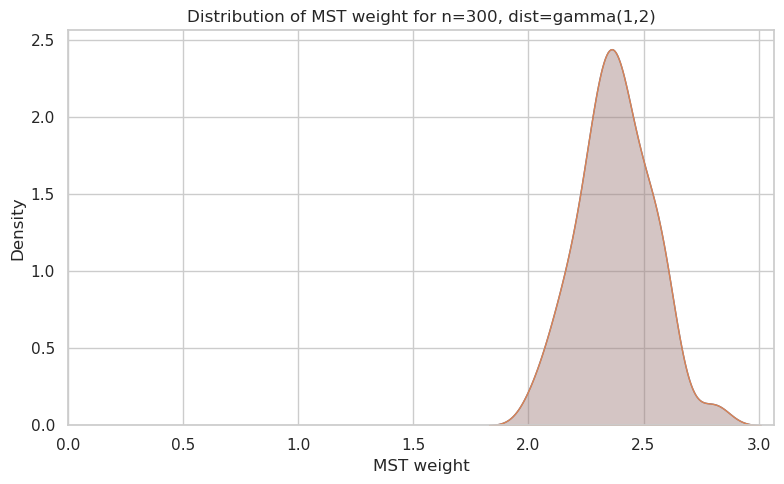

/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


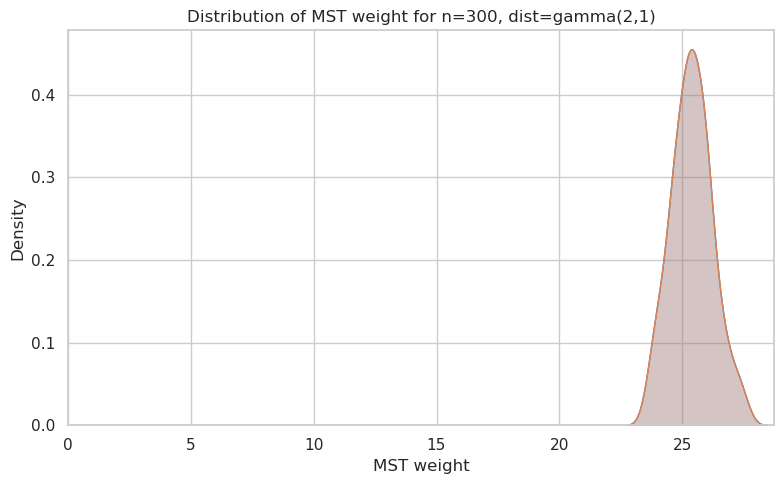

/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


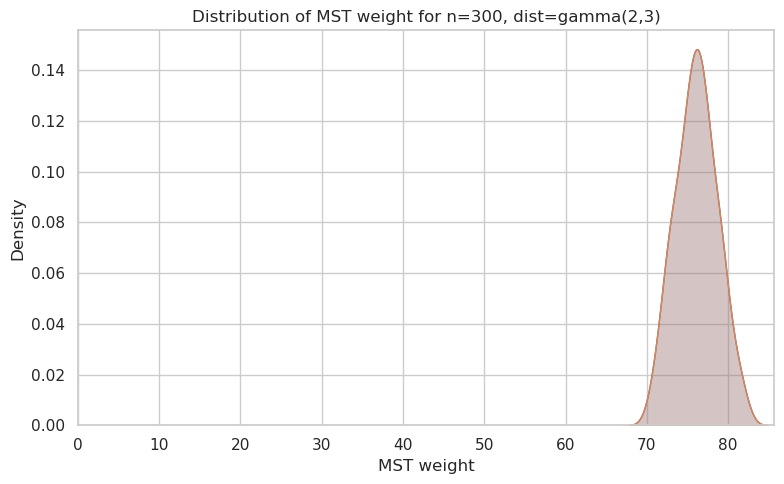

/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/bartek/anaconda3/envs/kombi/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


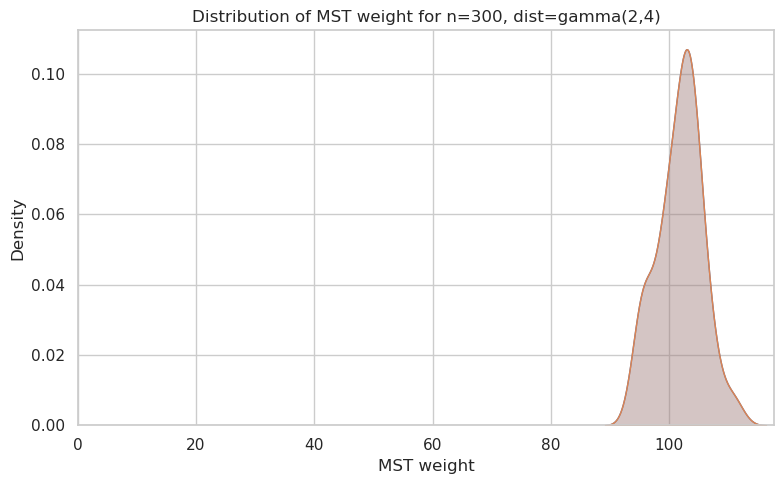

In [10]:
sns.set_theme(style="whitegrid")

# 1) Czasy: średni czas vs n (z paskiem std) dla obu algorytmów i dla każdego rozkładu
for dist_name in df['dist'].unique():
  plt.figure(figsize=(8, 5))
  sub = summary_df[summary_df['dist'] == dist_name]
  sns.lineplot(data=sub, x='n', y='time_mean', hue='alg', marker='o')
  # pokaż standard deviation jako wypełnienie (ręcznie
  for alg in ['prim', 'kruskal']:
    alg_sub = sub[sub['alg'] == alg]
    plt.fill_between(alg_sub['n'],
                     alg_sub['time_mean'] - alg_sub['time_std'],
                     alg_sub['time_mean'] + alg_sub['time_std'],
                     alpha=0.2)
  plt.title(f'Average runtime vs n (dist={dist_name})')
  plt.xlabel('n (liczba wierzchołków)')
  plt.ylabel('czas [s]')
  plt.legend(title='alg')
  plt.tight_layout()
  plt.savefig(f'runtime_vs_n_{dist_name}.png', dpi=150)
  plt.show()

# 2) Histogram / KDE rozkładu wag MST dla jednej wybranej wielkości n (np. najwyższe n)
for dist_name in df['dist'].unique():
  max_n = df[df['dist'] == dist_name]['n'].max()
  sub = df[(df['dist'] == dist_name) & (df['n'] == max_n)]
  plt.figure(figsize=(8,5))
  sns.kdeplot(sub['prim_cost'], label='Prim', fill=True).set(xlim=(0))
  sns.kdeplot(sub['kruskal_cost'], label='Kruskal', fill=True).set(xlim=(0))
  plt.title(f'Distribution of MST weight for n={max_n}, dist={dist_name}')
  plt.xlabel('MST weight')
  plt.tight_layout()
  plt.savefig(f'mst_weight_dist_n{max_n}_{dist_name}.png', dpi=150)
  plt.show()

#### Zapis wyników do csv


In [ ]:
df.to_csv('mst_experiment_raw1.csv', index=False)
summary_df.to_csv('mst_experiment_summary1.csv', index=False)

print('Wszystkie wyniki zapisane: mst_experiment_raw1.csv i mst_experiment_summary1.csv')

#### (opcjonalnie) Wczytaj dane z plików

In [8]:
df = pd.read_csv("mst_experiment_raw1.csv")

# Remove negative values — if any appear, something is wrong in earlier code,
# but we sanitize anyway to avoid plotting nonsense.
for col in ["prim_time", "kruskal_time", "prim_cost", "kruskal_cost"]:
    df = df[df[col] >= 0]

# Save a cleaned version
df.to_csv("mst_experiment_raw_clean.csv", index=False)

summary_df = summarize_times_and_costs(df)
summary_df.to_csv("mst_experiment_summary_clean.csv", index=False)

print("Plots created. Clean CSV saved: mst_experiment_raw_clean.csv, mst_experiment_summary_clean.csv")


Plots created. Clean CSV saved: mst_experiment_raw_clean.csv, mst_experiment_summary_clean.csv
